In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from importlib import reload

In [2]:
#Loading data to a DataFrame using Pandas and displaying it

data=pd.read_csv('/home/mhmd/Documents/Datasets/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#Checking shape of the Data

data.shape

(13320, 9)

In [4]:
#Checking the number of unique values in each category

data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [5]:
#Dropping features that are not required to build our model

df1=data.drop(['availability','society','area_type','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#Checking for null values

df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#There are many methods to deal with null values which include imputer and machine learning algorithms.
#Here I am just dropping it, Because it's very low in count

df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
#Exploring the size column
#Checking unique values in the size column

df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
#Creating a bhk(int) column from the size column

df3=df2.copy()
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.drop(['size'],axis=1,inplace=True)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [10]:
df3['bhk'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 19,
       27, 43])

In [11]:
#Exploring the Total square feet column


df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
#Creating a function to check whether it's a float or not

def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [13]:
#Displaying the non-float contents

df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [14]:
#The total square feet can be a range(100-200).
#Here I am taking the average of the range.
#Ignoring other cases.

def tts(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return ((float(tokens[0])+float(tokens[1]))/2)
  try:
    return float(x)
  except:
    return None

In [15]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(tts)

In [16]:
df4.isna().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [17]:
df4.dropna(inplace=True)

In [18]:
#Exploring location feature

temp=pd.DataFrame(df4.groupby('location') ['location'].count().sort_values(ascending=False))
temp

,location
location,
Whitefield,532
Sarjapur Road,392
Electronic City,302
Kanakpura Road,264
Thanisandra,232
...,...
Banaswadi,1
Kanakadasa Layout,1
Kanakapur main road,1


In [19]:
#Transform all locations by count less than 10 to 'other' category

df5=df4.copy()
df5['location']=df5['location'].apply(lambda x: 'other' if temp.loc[x,'location']<=10 else x.strip())
df5['location'].value_counts()

other                        2887
Whitefield                    532
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                264
                             ... 
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Marsur                         11
LB Shastri Nagar               11
Name: location, Length: 241, dtype: int64

In [20]:
#Creating a new feature called price per square ft

df6=df5.copy()
df6['price_per_square_feet']=(df6['price']*100000)/df6['total_sqft']
df6.head()

,location,total_sqft,bath,price,bhk,price_per_square_feet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [21]:
#Removing row's where Total Square ft / bhk is less than 300
#Taking 300 as the average square ft per bedroom

df6=df6[~(df6['total_sqft']/df6['bhk']<300)]
df6.shape

(12456, 6)

In [22]:
df6.price_per_square_feet.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_square_feet, dtype: float64

In [23]:
#Removing outliers from 'price per square ft' using Standard Deviation and Mean

def remove_pps_outlier(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_square_feet)
    st=np.std(subdf.price_per_square_feet)
    reduced_df=subdf[(subdf.price_per_square_feet>(m-st)) & (subdf.price_per_square_feet<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7=remove_pps_outlier(df6)
df7.shape

(10245, 6)

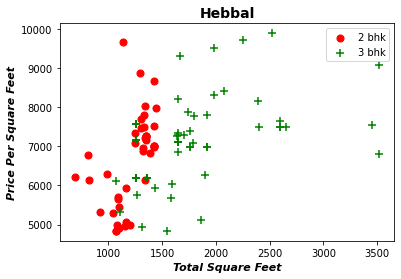

In [24]:
#Analysing the 2 BHK and 3 BHK property prices in a given location

def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(25,7)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_square_feet,color='red',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_square_feet,marker='+',color='green',label='3 bhk',s=50)
    reload(plt)
    plt.xlabel('Total Square Feet',style='italic',fontweight='bold',size=11)
    plt.ylabel('Price Per Square Feet',style='italic',fontweight='bold',size=11)
    plt.title(location,size=14,fontweight='bold')
    plt.legend()

plot_scatter_chart(df7,'Hebbal')

In [25]:
#The price of (for example) a 3-bedroom apartment is less than a 2-bedroom apartment (with the same sq ft area). We will remove such types of data.

def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_square_feet),
          'std':np.std(bhk_df.price_per_square_feet),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_square_feet<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df8=remove_bhk_outliers(df7)
df8.shape

(7331, 6)

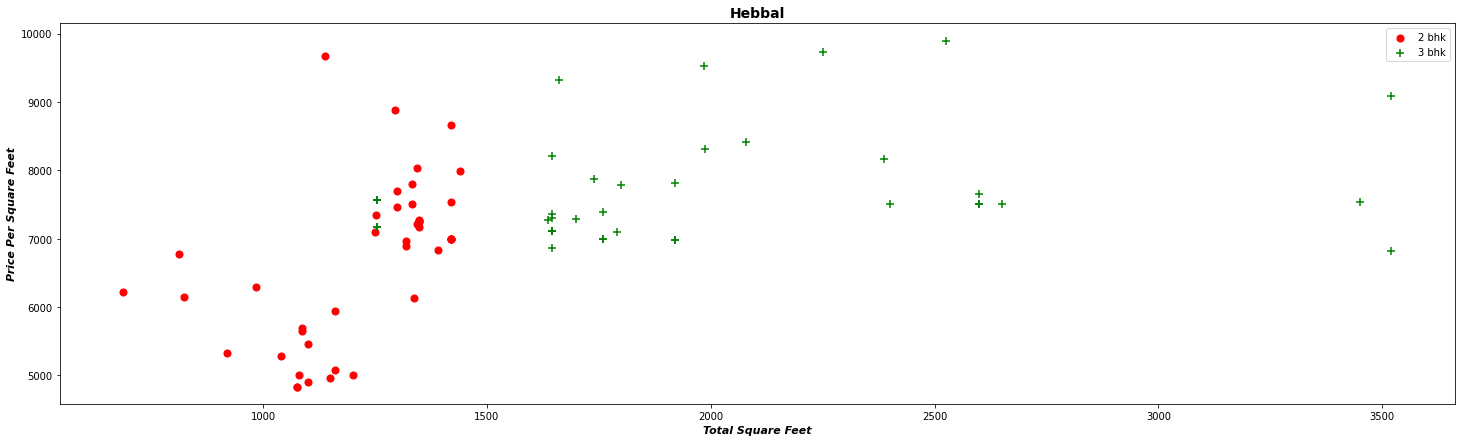

In [26]:
#bhk outliers are removed

plot_scatter_chart(df8,'Hebbal')

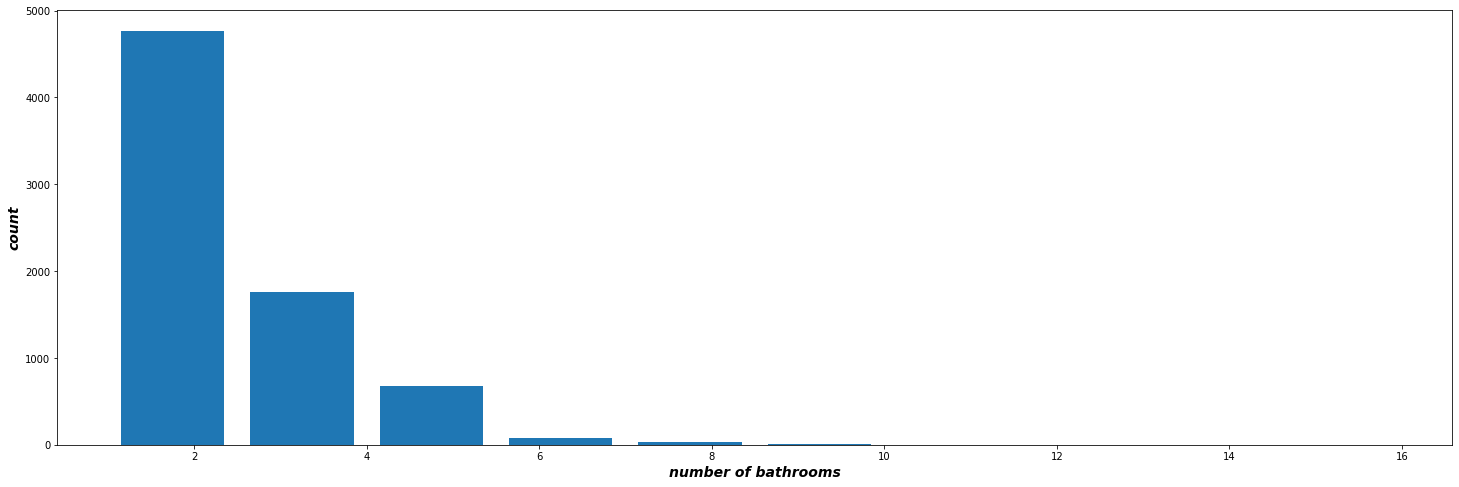

In [27]:
#Exploring the Bathroom Feature

matplotlib.rcParams['figure.figsize']=(25,8)
reload(plt)
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('number of bathrooms',size=14,style='italic',fontweight='bold')
plt.ylabel('count',size=14,style='italic',fontweight='bold')
plt.show()

In [28]:
#Analysing the unique values by count

df8['bath'].value_counts()

2.0     4191
3.0     1763
1.0      579
4.0      501
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
16.0       1
13.0       1
Name: bath, dtype: int64

In [29]:
df8.loc[df8['bath']>10]

,location,total_sqft,bath,price,bhk,price_per_square_feet
5271,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8478,other,12000.0,12.0,525.0,10,4375.000000
8567,other,10000.0,16.0,550.0,16,5500.000000
9307,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


In [30]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home

df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_square_feet
1624,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8402,other,11338.0,9.0,1000.0,6,8819.897689


In [31]:
#Removing such Outliers from our data

df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7253, 6)

In [32]:
#Removing the price_per_square_feet column

df10=df9.drop(['price_per_square_feet'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [33]:
len(df10.location.value_counts())

241

In [34]:
#Using One Hot Encoder for location column

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df11 = pd.concat([df10.drop(['location'],axis=1),dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df11.shape

(7253, 244)

In [37]:
#Creating x and y (dependent and independent variables)

x = df11.drop(['price'],axis='columns')
y = df11['price']

In [38]:
#Splitting the data for training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
#Here I am using LinearRegression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(f'Model Score:{model.score(x_test,y_test)}')
y_pred=model.predict(x_test)

Model Score:0.8895562453970538


In [40]:
#Creating a function for prediction

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]
    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bhk
    if loc_index >= 0:
        a[loc_index] = 1
    a=pd.DataFrame(a.reshape(1,-1),columns=x.columns)
    return model.predict(a)[0]

In [41]:
#Predicting a house price using some values

loc=     input("Enter the Location                :")
sqft=int(input("Enter the total square feet       :"))
bath=int(input("Enter the number of bathrooms     :"))
bhk= int(input("Enter the number of bedrooms/bhk  :"))
print('\n\n')
print(f'The house price will be RS.{round(predict_price(loc,sqft,bath,bhk))} Lakh ')

Enter the Location                : Indira Nagar
Enter the total square feet       : 1000
Enter the number of bathrooms     : 2
Enter the number of bedrooms/bhk  : 2





The house price will be RS.185 Lakh 


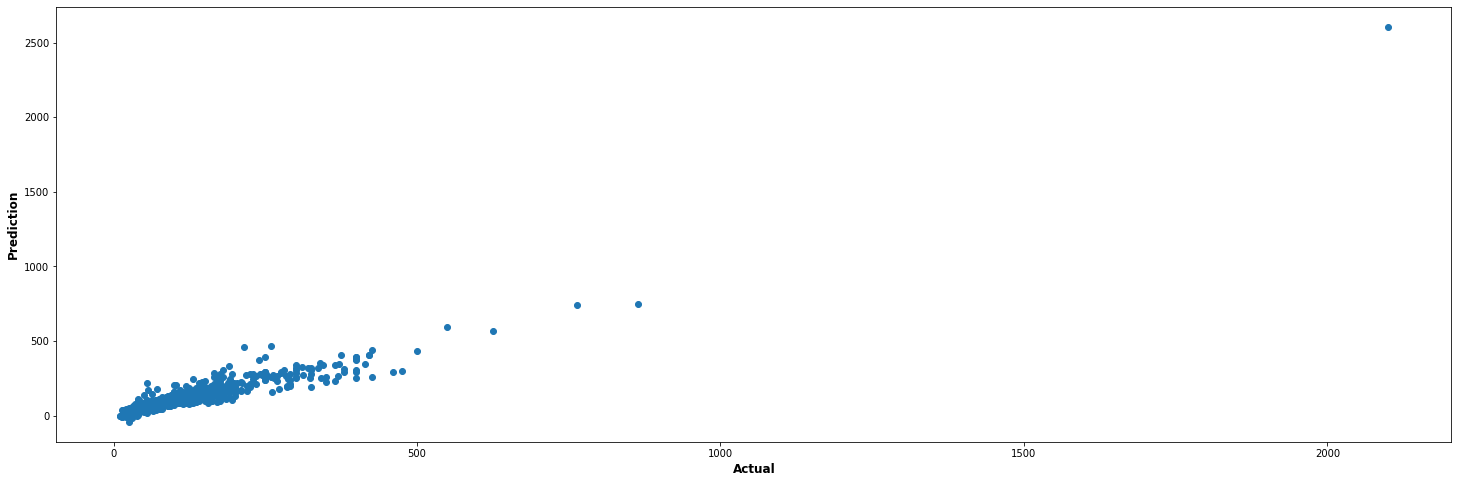

In [42]:
#Plotting y_test vs y_pred
#The plot is co-related positively

matplotlib.rcParams['figure.figsize']=(25,8)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual',size=12,fontweight='bold')
plt.ylabel('Prediction',size=12,fontweight='bold')
plt.show()